Для робота RPRPR разработать систему неравенств и программно реализовать
применив метод оптимизации без производных (блэк бокс) из scipy.optimize для максимизации объема рабочей области при фиксированных lmax, lmin и d в качестве параметра (0 <= d <= 2 * lmax).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math

For otimization I want to try Nelder-Mead method from scipy.optimize.minimize(method=’Nelder-Mead’)
OR should I use COBYLA?

scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)

In [2]:
#wrong
def work_area(y, d):
    return 0.5*y*d

In [3]:
#ok below

In [4]:
l1min = 60
l2min = 60
l1max = 100
l2max = 100
d = 50

In [5]:
def f01(x,y,l1min):
    print(x)
    print(y)
    print(l1min)
    print(math.sqrt(x**2+y**2))
    return math.sqrt(x**2+y**2)-l1min

def f02(x,y,l1max):
    return math.sqrt(x**2+y**2)-l1max

def f03(x,y,l2min):
    return math.sqrt((d-x)**2+y**2)-l2min

def f04(x,y,l2max):
    return math.sqrt((d-x)**2+y**2)-l2max

def fm01(x,l1min):
    return math.sqrt(l1min**2-x**2)

def fm02(x,l1max):
    return math.sqrt(l1max**2-x**2)

def fm03(x,l2min):
    return math.sqrt(l2min**2-(d-x)**2)

def fm04(x,l2max):
    return math.sqrt(l2max**2-(d-x)**2)

In [6]:
def is_inside(x, y, d_iter):
    if x**2+y**2 >= l1min**2:
        if x**2+y**2 <= l1max**2:
            if (d_iter-x)**2+y**2 >= l2min**2:
                if (d_iter-x)**2+y**2 <= l2max**2:
                    return 1
    return 0

In [7]:
y1 = np.arange(0, 200)
y2 = np.arange(0, 200)
y3 = np.arange(0, 200)
y4 = np.arange(0, 200)

#x1 = [fm01(x,l1min) for x in y1]
#x2 = [fm02(x,l1max) for x in y2]
#x3 = [fm03(x,l2min) for x in y3]
#x4 = [fm04(x,l2max) for x in y4]

#plt.plot(y1, x1, '-o')
#plt.plot(y2, x2, '-o')
#plt.plot(y3, x3, '-o')
#plt.plot(y4, x4, '-o')

#plt.show()

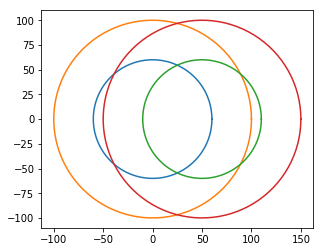

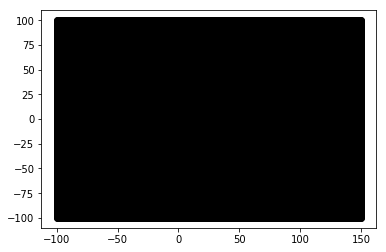

In [8]:
# theta goes from 0 to 2pi
theta = np.linspace(0, 2*np.pi, 100)

x1 = l1min*np.cos(theta)
x2 = l1min*np.sin(theta)
x3 = l1max*np.cos(theta)
x4 = l1max*np.sin(theta)
x5 = l2min*np.cos(theta)+d
x6 = l2min*np.sin(theta)
x7 = l2max*np.cos(theta)+d
x8 = l2max*np.sin(theta)

my_grid = []
grid_size = 160
grid_density = 1
grid_y = np.arange(-100, grid_size-11,1/grid_density)
grid_x = np.arange(-100, grid_size-11,1/grid_density)

i=0
while i < len(grid_y):
    j=0
    while j < len(grid_x):
        my_grid.append((grid_x[i] , grid_y[j]))
        j=j+1
    
    i=i+1
    
    
grid_y = []
grid_x = []      
i=0
while i < len(my_grid):
    grid_y.append(my_grid[i][1])
    grid_x.append(my_grid[i][0])
    i=i+1
    
    

gr_x = np.linspace(-100, 150, 250)
gr_y = np.linspace(-100, 100, 200)
gr_X, gr_Y = np.meshgrid(gr_x,gr_y)

    
fig, ax = plt.subplots(1)
ax.plot(x1, x2)
ax.plot(x3, x4)
ax.plot(x5, x6)
ax.plot(x7, x8)
ax.set_aspect(1)
plt.show()


#plt.scatter(grid_x, grid_y, color = 'black')
plt.scatter(gr_X, gr_Y, color = 'black')
plt.show()

In [37]:
def count_area_new(d_iter):
    S_square=len(gr_x)*len(gr_y) #50 000
    number_of_points = len(gr_x)*len(gr_y) #50 000
    number_inside = 0
    for i in range(len(gr_x)):
        for j in range(len(gr_y)):
            number_inside+=is_inside(gr_x[i], gr_y[j], d_iter)
    S=(S_square*number_inside/number_of_points)/2 # /2 из-за того, что области на графике две, но в реальности она одна
    return S

In [38]:
count_area_new(d)

2820.0

In [39]:
d_iter = 0
step = 1
while d_iter < 1*l1max*2:
    print(count_area_new(d_iter))
    print(d_iter)
    d_iter+=step


9947.0
0
9789.0
1
9632.0
2
9475.0
3
9316.0
4
9157.0
5
9000.0
6
8841.0
7
8683.0
8
8527.0
9
8368.0
10
8210.0
11
8052.0
12
7895.0
13
7737.0
14
7579.0
15
7424.0
16
7268.0
17
7110.0
18
6952.0
19
6797.0
20
6642.0
21
6484.0
22
6326.0
23
6169.0
24
6013.0
25
5858.0
26
5702.0
27
5546.0
28
5390.0
29
5235.0
30
5080.0
31
4924.0
32
4769.0
33
4615.0
34
4461.0
35
4306.0
36
4151.0
37
3997.0
38
3844.0
39
3690.0
40
3560.0
41
3447.0
42
3344.0
43
3250.0
44
3165.0
45
3086.0
46
3013.0
47
2943.0
48
2879.0
49
2820.0
50
2762.0
51
2706.0
52
2654.0
53
2602.0
54
2555.0
55
2510.0
56
2466.0
57
2424.0
58
2385.0
59
2348.0
60
2312.0
61
2278.0
62
2245.0
63
2214.0
64
2184.0
65
2156.0
66
2128.0
67
2100.0
68
2074.0
69
2050.0
70
2027.0
71
2004.0
72
1982.0
73
1960.0
74
1938.0
75
1920.0
76
1902.0
77
1884.0
78
1869.0
79
1853.0
80
1838.0
81
1824.0
82
1810.0
83
1798.0
84
1786.0
85
1772.0
86
1759.0
87
1746.0
88
1735.0
89
1724.0
90
1715.0
91
1705.0
92
1697.0
93
1686.0
94
1678.0
95
1670.0
96
1665.0
97
1658.0
98
1651.0
99
1645.0
100

In [31]:
count_area_new(10*l1max*2-1000)

ZeroDivisionError: division by zero

In [12]:
# def count_area(nodes):
#     S=0
#     i=0
#     row_len = grid_size*grid_density
#     while i < len(my_grid)-row_len:
#         j=i
#         while j < i+row_len-1:
#             nodes_inside = 0
#             if(is_inside(my_grid[j][1], my_grid[j][0]) == 1):
#                 nodes_inside=nodes_inside+1
#             if(is_inside(my_grid[j+1][1], my_grid[j+1][0]) == 1):
#                 nodes_inside=nodes_inside+1
#             if(is_inside(my_grid[j+row_len][1], my_grid[j+row_len][0]) == 1):
#                 nodes_inside=nodes_inside+1
#             if(is_inside(my_grid[j+row_len+1][1], my_grid[j+grid_size+1][0]) == 1):
#                 nodes_inside=nodes_inside+1
                
#             if(nodes_inside == 4):
#                 S=S+1
#             if(nodes_inside == 1 or nodes_inside == 2 or nodes_inside == 3):
#                 S=S+(1/2)
#             j=j+1
#         i+=row_len

#     return S/grid_density**2

In [13]:
# count_area(my_grid)

TypeError: is_inside() missing 1 required positional argument: 'd_iter'

In [ ]:
def f1(x,y,lmax):
    return x**2 + y**2 - lmax**2

In [ ]:
def f2(x,y,lmin):
    return lmin**2 - x**2 - y**2

In [ ]:
def f3(l,lmin):
    return lmin - l

In [ ]:
def f4(l,lmax):
    return l - lmax

In [ ]:
def f5(d,lmax):
    return d - 2*lmax

In [ ]:
def f6(d):
    return -d

In [ ]:
def f7(d):
    return 0.5*d

In [ ]:
#x=sqrt(l^2+(d/2)^2)
def f8(l, d):
    return sqrt(l**2+(d/2)**2)

In [ ]:
lmin = 1000
lmax = 2000
d0 = 2

In [ ]:
work_area(2,d0)

Вопросы:

1) У нас l1 и l2 не равны!!!

2) Какой метод использовать и как в нём задаывать ограничения?